# PROJECTE DE CLASSIFICACIÓ: Credit Card Approvals I

Aquest projecte es divideix en dos parts, la primera correspon al present notebook, anomenat: **PROJECTE DE CLASSIFICACIÓ: Credit Card Approvals I**.
        
En el present estudi s'analitza, s'explora i s'aplica models de classificació.
El dataset que treballarem es pot trobar en la següent página: https://archive.ics.uci.edu/ml/datasets/credit+approval.

### Llibreries

In [1]:
import pandas as pd 
import pandas.core.algorithms as algos
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import seaborn as sns
from scipy import stats
import missingno as msno

import scipy.stats.stats as stats
import re
import traceback
import string

import warnings
warnings.filterwarnings('ignore')

In [368]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from pandas import DataFrame
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score, classification_report, balanced_accuracy_score, roc_auc_score
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.datasets import load_occupancy

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [233]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [224]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pipreqsnb

In [ ]:
pipreqsnb ./requeriments

## Data Understanding

La decisió d'aprovar una targeta de crèdit o un préstec depèn principalment dels antecedents personals i financers del sol·licitant. Factors com *Gender*, *Age*, *Debt*, *Married*, *BankCustomer*, *EducationLevel*, *Ethnicity*, *YearsEmployed*, *PriorDefault*, *Employed*, *CreditScore*, *DriversLicense*, *Citizen*, *ZipCode*, *Income* i la variable resposta, *ApprovalStatus*, tindràn diferents pes en la decisió d'aprovació. L'anàlisi de dades de crèdit implica la mesura per investigar la probabilitat que un tercer retorni el préstec al banc a temps i predir la seva característica d'impagament. L'anàlisi se centra a reconèixer, avaluar i reduir els riscos financers o d'altres tipus que podrien provocar pèrdues implicades en l'operació.

Hi ha dos riscos bàsics: un és una pèrdua de negoci que resulta de no aprovar el crèdit, i l'altre és la pèrdua econòmica que resulta d'aprovar el candidat que no cumpleix les obligacions de pagament. És important, doncs gestionar el risc de crèdit i gestionar els reptes de manera eficient per a la decisió de l'aprovació de crèdit, ja que pot tenir efectes adversos en la gestió del crèdit. 

L'objectiu principal d'aquest anàlisi és implementar les tècniques de mineria de dades en un conjunt de dades en l'aprovació de la targeta de crèdit, identificar riscos i obtenir conclusions basades en dades sobre la probabilitat d'impagament de factures. 

 ### App Record Numeric Dataset

In [7]:
archiu = open('./dataset/crx.names', mode='r')
data_description = archiu.read()
print(data_description)


1. Title: Credit Card Approval

2. Sources: 
    Submitted by quinlan@cs.su.oz.au

    Source: UCI - 1987 - 'http://archive.ics.uci.edu/ml/datasets/credit+approval'
    Please cite: UCI - 'http://archive.ics.uci.edu/ml/citation_policy.html'

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
  
    This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

5.  This data concerns credit card applications

    Dataset Characteristics: Multivariate

    Subject Area: Financial

    Associated Tasks: Classification

  

In [369]:
#Dataset: credit-approval numeric

df_num = pd.read_csv('./dataset/credit-approval.csv', delimiter=",", decimal=".", encoding ='utf8')
df_num.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.00,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.00,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,280.00,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100.00,3,+
4,b,20.17,5.62,u,g,w,v,1.71,t,f,0,f,s,120.00,0,+


In [370]:
df_num = df_num.rename(columns={'A1':'Gender', 'A2':'Age', 'A3':'Debt', 'A4':'Married', 'A5':'BankCustomer', 'A6':'EducationLevel', 
                                'A7':'Ethnicity', 'A8':'YearsEmployed', 'A9':'PriorDefault', 'A10':'Employed', 'A11':'CreditScore', 
                                'A12':'DriversLicense', 'A13':'Citizen', 'A14':'ZipCode', 'A15':'Income', 'class':'Approval'})
df_num.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approval
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.00,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.00,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,280.00,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100.00,3,+
4,b,20.17,5.62,u,g,w,v,1.71,t,f,0,f,s,120.00,0,+


### Preprocessing data

Tasques principals:
    
* Tractament dels missing values
* Convertir les dades no numèriques en numèriques
* Tractament dels Outliers
* Dividir les dades en entrenament i conjunts de proves
* Escalar els valors de les característiques a un interval uniforme


In [371]:
df_num.shape

(690, 16)

In [372]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    float64
 14  Income          690 non-null    int64  
 15  Approval        690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


En  la sortida de dtype s'identifica el tipus de data que conté les diverses columnes: objecte (cadena o barreja). Els algorismes d'aprenentatge automàtic requereixen que totes les variables siguin de tipus de dades numèriques. Més endavant es tractarà. Procedim a minimitzar l'emmagatzematge de les dades. Explorem més detalls.

In [373]:
df_num.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.00,690.00,690.00,690.00,677.00,690.00
mean,31.57,4.76,2.22,2.40,184.01,1017.39
std,11.96,4.98,3.35,4.86,173.81,5210.10
min,13.75,0.00,0.00,0.00,0.00,0.00
25%,22.60,1.00,0.17,0.00,75.00,0.00
50%,28.46,2.75,1.00,0.00,160.00,5.00
75%,38.23,7.21,2.62,3.00,276.00,395.50
max,80.25,28.00,28.50,67.00,2000.00,100000.00


In [374]:
print("Nombre de variables úniques: ")

for ColName in df_num:
        print("{} = {}".format(ColName, len(df_num[ColName].unique())))

Nombre de variables úniques: 
Gender = 3
Age = 350
Debt = 215
Married = 4
BankCustomer = 4
EducationLevel = 15
Ethnicity = 10
YearsEmployed = 132
PriorDefault = 2
Employed = 2
CreditScore = 23
DriversLicense = 2
Citizen = 3
ZipCode = 171
Income = 240
Approval = 2


In [375]:
# estudi de les variables categòriques

for i in df_num.columns:
    print(i)
    if df_num[i].dtype==object:
        print(df_num[i].unique())

Gender
['b' 'a' nan]
Age
Debt
Married
['u' 'y' nan 'l']
BankCustomer
['g' 'p' nan 'gg']
EducationLevel
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
Ethnicity
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
YearsEmployed
PriorDefault
['t' 'f']
Employed
['t' 'f']
CreditScore
DriversLicense
['f' 't']
Citizen
['g' 's' 'p']
ZipCode
Income
Approval
['+' '-']


Resum de les columnes amb un dtype numèric. Observem que 2 variables tenen un interval de 0-28, 1 té un interval de 0-67, i 1 té un interval de 0-100000, 1 entre 0-2000 i per últim entre 13,75 a 80,25. Pertant, per assegurar una bona predicció en models d'aprenentatge automàtic, les dades hauràn de ser escalades utilitzant diferents tècniques.

#### Tractament dels Missing Values

In [376]:
# anàlisis dels valors nulls

def miss_values(df_num):
    
    #Dimensió del dataset
    dim= df_num.size
    #Nombre de valors nulls per columna
    missingCount = df_num.isnull().sum()
    #Total del nombre de valors nuls 
    missing_tot = missingCount.sum()
    #Calcula el percentatge dels valors nulls
    print(f'Total de valors nuls per columna: \n\n \b \b \b',missingCount)
    print("El dataset conté: ", round(((missing_tot/dim) * 100), 2), "%", "valors nuls.\n\n\n")
    

def plot_miss_values(df_num:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    
    #Nombre total de valors nulls per columna
    missing = df_num.isnull().sum() 
    # només les columnes que contenen missing values>0 
    missing = missing[missing > 0] 
    # ordenem
    missing.sort_values(inplace=True) 
    missing.plot.bar(color='blue')
    plt.title(title, size=15)
    plt.xticks(fontsize=11,rotation=45)
    plt.yticks(fontsize=11)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()

Total de valors nuls per columna: 

    Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approval           0
dtype: int64
El dataset conté:  0.61 % valors nuls.





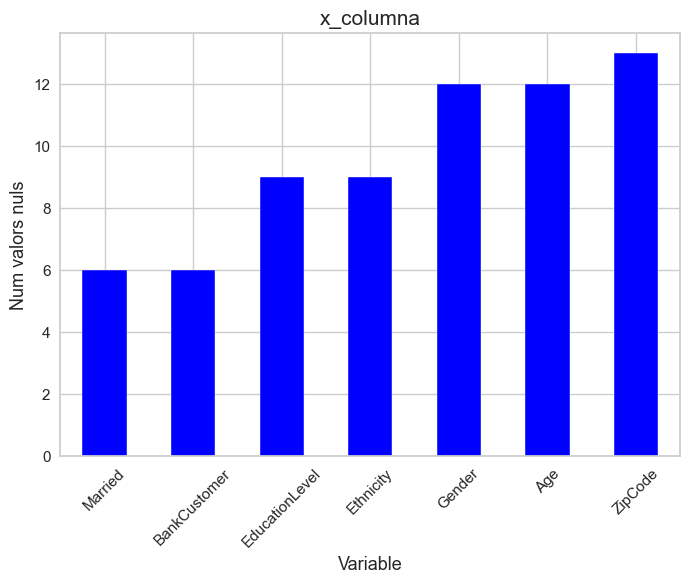

In [377]:
# apliquem les funcions descrites anteriorment
    
miss_values(df_num);
plot_miss_values(df_num,'x_columna','Variable','Num valors nuls')

In [ ]:
NULL

In [378]:
df_numeric = df_num.select_dtypes(include=['float64', 'int64'])

for num in df_numeric.columns:
    print(f" El promig {num} : \n{df_numeric[num].mean()}\n")

 El promig Age : 
31.56817109144546

 El promig Debt : 
4.7587246376811585

 El promig YearsEmployed : 
2.2234057971014476

 El promig CreditScore : 
2.4

 El promig ZipCode : 
184.01477104874445

 El promig Income : 
1017.3855072463768



In [379]:
#Frequecia dels valors categòrics

df_categoric = df_num.select_dtypes(include=['object']) 

for cat in df_categoric.columns:
    print(f" Frequencia {cat} : \n{df_categoric[cat].value_counts()}\n")
          

 Frequencia Gender : 
b    468
a    210
Name: Gender, dtype: int64

 Frequencia Married : 
u    519
y    163
l      2
Name: Married, dtype: int64

 Frequencia BankCustomer : 
g     519
p     163
gg      2
Name: BankCustomer, dtype: int64

 Frequencia EducationLevel : 
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

 Frequencia Ethnicity : 
v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

 Frequencia PriorDefault : 
t    361
f    329
Name: PriorDefault, dtype: int64

 Frequencia Employed : 
f    395
t    295
Name: Employed, dtype: int64

 Frequencia DriversLicense : 
f    374
t    316
Name: DriversLicense, dtype: int64

 Frequencia Citizen : 
g    625
s     57
p      8
Name: Citizen, dtype: int64

 Frequencia Approval : 
-    383
+    307
Name: Approval, dtype: int64



In [477]:
def impute_nans(df_numeric, col):
    
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors = 'coerce')
    df_numeric[col].fillna(df_numeric[col].mean(), inplace = True) 


In [478]:
for col in df_numeric.columns:
    impute_nans(df_numeric, col)
    
df_numeric.isnull().sum() 

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

In [382]:
df_numeric.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income'], dtype='object')

In [479]:
df_numeric[df_numeric.select_dtypes(np.float64).columns] = df_numeric.select_dtypes(np.float64).astype(np.float32)
df_numeric[df_numeric.select_dtypes(np.int64).columns] = df_numeric.select_dtypes(np.int64).astype(np.int32)

df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            690 non-null    float32
 1   Debt           690 non-null    float32
 2   YearsEmployed  690 non-null    float32
 3   CreditScore    690 non-null    int32  
 4   ZipCode        690 non-null    float32
 5   Income         690 non-null    int32  
dtypes: float32(4), int32(2)
memory usage: 16.3 KB


In [480]:
#tractem els valors nuls amb el reemplaçament dels valor mitjos de cada variable numèrica i per la mode per les variables categóriques. Amb l'objectiu de no perdre informació, que els resultats del models a posteriori siguin el més acurat possible i minimitzar el biaix que es pogués donar-se.


# Funció que imputa el valor categòric més repetit que reemplaça al valor nul

def replace_nans(df_categoric, ColName):
    
    #agreguem una nova columna i reeplacem si el valor categoric és null serà 1 i 0 si no 
    
    df_categoric[ColName+"_Imputad"] = np.where(df_categoric[ColName].isnull(),1,0)
    
    #seleccionem el valor més repetit (.mode())
    
    Mode_Category = df_categoric[ColName].mode()[0]
    
    # Remplça els valors nans per el valor més repetit en l'actual variable
    
    df_categoric[ColName].fillna(Mode_Category,inplace=True)
    

In [481]:
#apliquem la funció per imputar els valors NANs

for Columns in df_categoric.columns:
    replace_nans(df_categoric, Columns)
    
# mostren 10 sortides per veure el resultat
df_categoric.head(10)

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approval,Gender_Imputad,Married_Imputad,BankCustomer_Imputad,EducationLevel_Imputad,Ethnicity_Imputad,PriorDefault_Imputad,Employed_Imputad,DriversLicense_Imputad,Citizen_Imputad,Approval_Imputad
0,b,u,g,w,v,t,t,f,g,+,0,0,0,0,0,0,0,0,0,0
1,a,u,g,q,h,t,t,f,g,+,0,0,0,0,0,0,0,0,0,0
2,a,u,g,q,h,t,f,f,g,+,0,0,0,0,0,0,0,0,0,0
3,b,u,g,w,v,t,t,t,g,+,0,0,0,0,0,0,0,0,0,0
4,b,u,g,w,v,t,f,f,s,+,0,0,0,0,0,0,0,0,0,0
5,b,u,g,m,v,t,f,t,g,+,0,0,0,0,0,0,0,0,0,0
6,b,u,g,r,h,t,f,t,g,+,0,0,0,0,0,0,0,0,0,0
7,a,u,g,cc,v,t,f,f,g,+,0,0,0,0,0,0,0,0,0,0
8,b,y,p,k,h,t,f,f,g,+,0,0,0,0,0,0,0,0,0,0
9,b,y,p,w,v,t,f,t,g,+,0,0,0,0,0,0,0,0,0,0


In [482]:
df_categoric.isnull().sum() 

Gender                    0
Married                   0
BankCustomer              0
EducationLevel            0
Ethnicity                 0
PriorDefault              0
Employed                  0
DriversLicense            0
Citizen                   0
Approval                  0
Gender_Imputad            0
Married_Imputad           0
BankCustomer_Imputad      0
EducationLevel_Imputad    0
Ethnicity_Imputad         0
PriorDefault_Imputad      0
Employed_Imputad          0
DriversLicense_Imputad    0
Citizen_Imputad           0
Approval_Imputad          0
dtype: int64

In [483]:
# eliminem les columnes "Imputad" del dataset df_categoric

for col in df_categoric.columns:
    if "_Imputad" in col:
        del df_categoric[col]

In [390]:
df_categoric.head(10)

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approval
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+
5,b,u,g,m,v,t,f,t,g,+
6,b,u,g,r,h,t,f,t,g,+
7,a,u,g,cc,v,t,f,f,g,+
8,b,y,p,k,h,t,f,f,g,+
9,b,y,p,w,v,t,f,t,g,+


In [149]:
df_categoric.columns

Index(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approval'],
      dtype='object')

In [484]:
no_miss_val = pd.concat([df_numeric, df_categoric], axis=1)

no_miss_val.head(10)

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approval
0,30.83,0.00,1.25,1,202.00,0,b,u,g,w,v,t,t,f,g,+
1,58.67,4.46,3.04,6,43.00,560,a,u,g,q,h,t,t,f,g,+
2,24.50,0.50,1.50,0,280.00,824,a,u,g,q,h,t,f,f,g,+
3,27.83,1.54,3.75,5,100.00,3,b,u,g,w,v,t,t,t,g,+
4,20.17,5.62,1.71,0,120.00,0,b,u,g,w,v,t,f,f,s,+
5,32.08,4.00,2.50,0,360.00,0,b,u,g,m,v,t,f,t,g,+
6,33.17,1.04,6.50,0,164.00,31285,b,u,g,r,h,t,f,t,g,+
7,22.92,11.59,0.04,0,80.00,1349,a,u,g,cc,v,t,f,f,g,+
8,54.42,0.50,3.96,0,180.00,314,b,y,p,k,h,t,f,f,g,+
9,42.50,4.91,3.16,0,52.00,1442,b,y,p,w,v,t,f,t,g,+


In [485]:
df_class = df_class.dropna(axis=0)

In [486]:
df_class = no_miss_val.copy(deep=True)

df_class.head(3)

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approval
0,30.83,0.00,1.25,1,202.00,0,b,u,g,w,v,t,t,f,g,+
1,58.67,4.46,3.04,6,43.00,560,a,u,g,q,h,t,t,f,g,+
2,24.50,0.50,1.50,0,280.00,824,a,u,g,q,h,t,f,f,g,+


In [487]:
df_class.isnull().sum() 

Age               0
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode           0
Income            0
Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
Approval          0
dtype: int64

#### Dummies 

In [488]:
def Encode_Data(df_class):   
    
    for col in df_class.columns:        
        if df_class[col].dtype.name == "object":
            le = LabelEncoder()
            df_class[col]=le.fit_transform(df_class[col])
    return df_class


In [395]:
Encode_Data(df_class)

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approval
0,30.83,0.00,1.25,1,202.00,0,1,1,0,12,7,1,1,0,0,0
1,58.67,4.46,3.04,6,43.00,560,0,1,0,10,3,1,1,0,0,0
2,24.50,0.50,1.50,0,280.00,824,0,1,0,10,3,1,0,0,0,0
3,27.83,1.54,3.75,5,100.00,3,1,1,0,12,7,1,1,1,0,0
4,20.17,5.62,1.71,0,120.00,0,1,1,0,12,7,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.09,1.25,0,260.00,0,1,2,2,4,3,0,0,0,0,1
686,22.67,0.75,2.00,2,200.00,394,0,1,0,1,7,0,1,1,0,1
687,25.25,13.50,2.00,1,200.00,1,0,2,2,5,2,0,1,1,0,1
688,17.92,0.20,0.04,0,280.00,750,1,1,0,0,7,0,0,0,0,1


In [396]:
def Display_Correlation(df_class):
    plt.figure(figsize=(20,15))
    corr = df_class.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap="PRGn",annot=True,vmin=-1, vmax=1,linewidths=1,linecolor='black')
    plt.show()

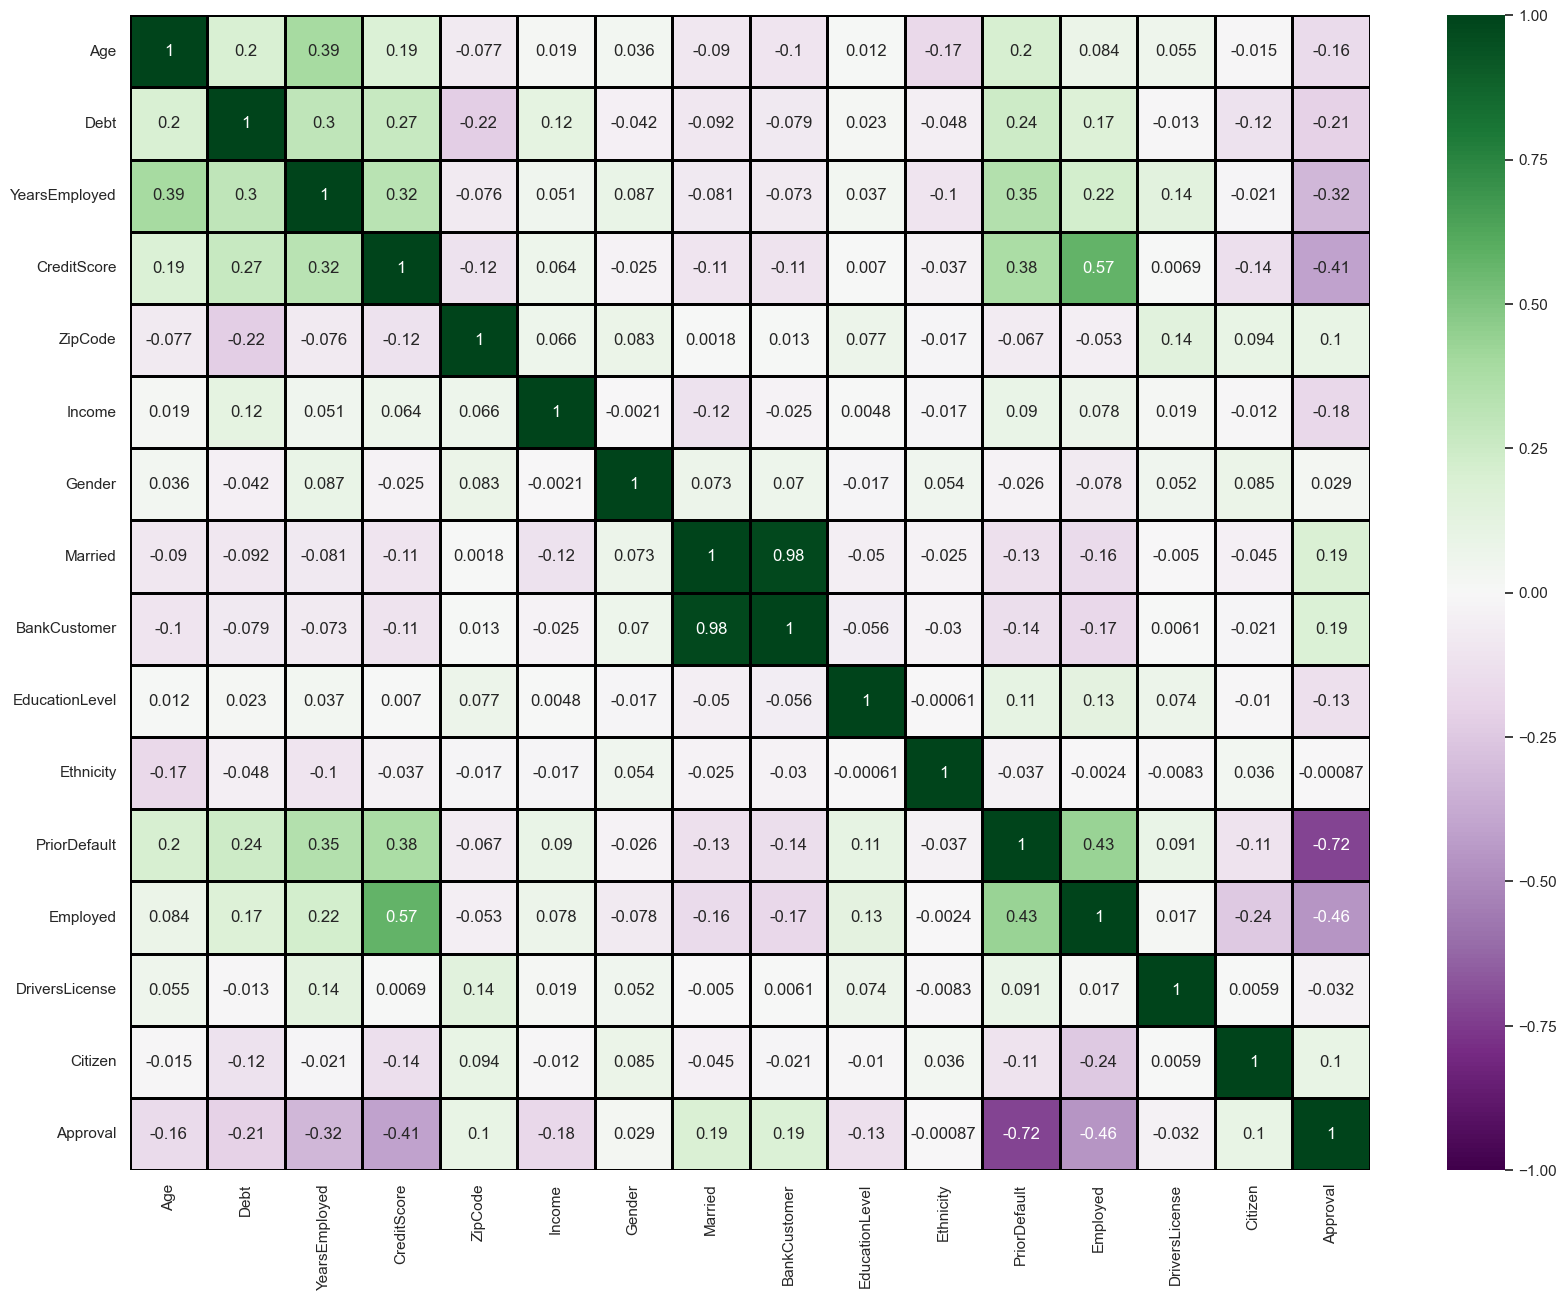

In [157]:
Display_Correlation(df_class)

### Exploratory Data Analysis (EDA) 

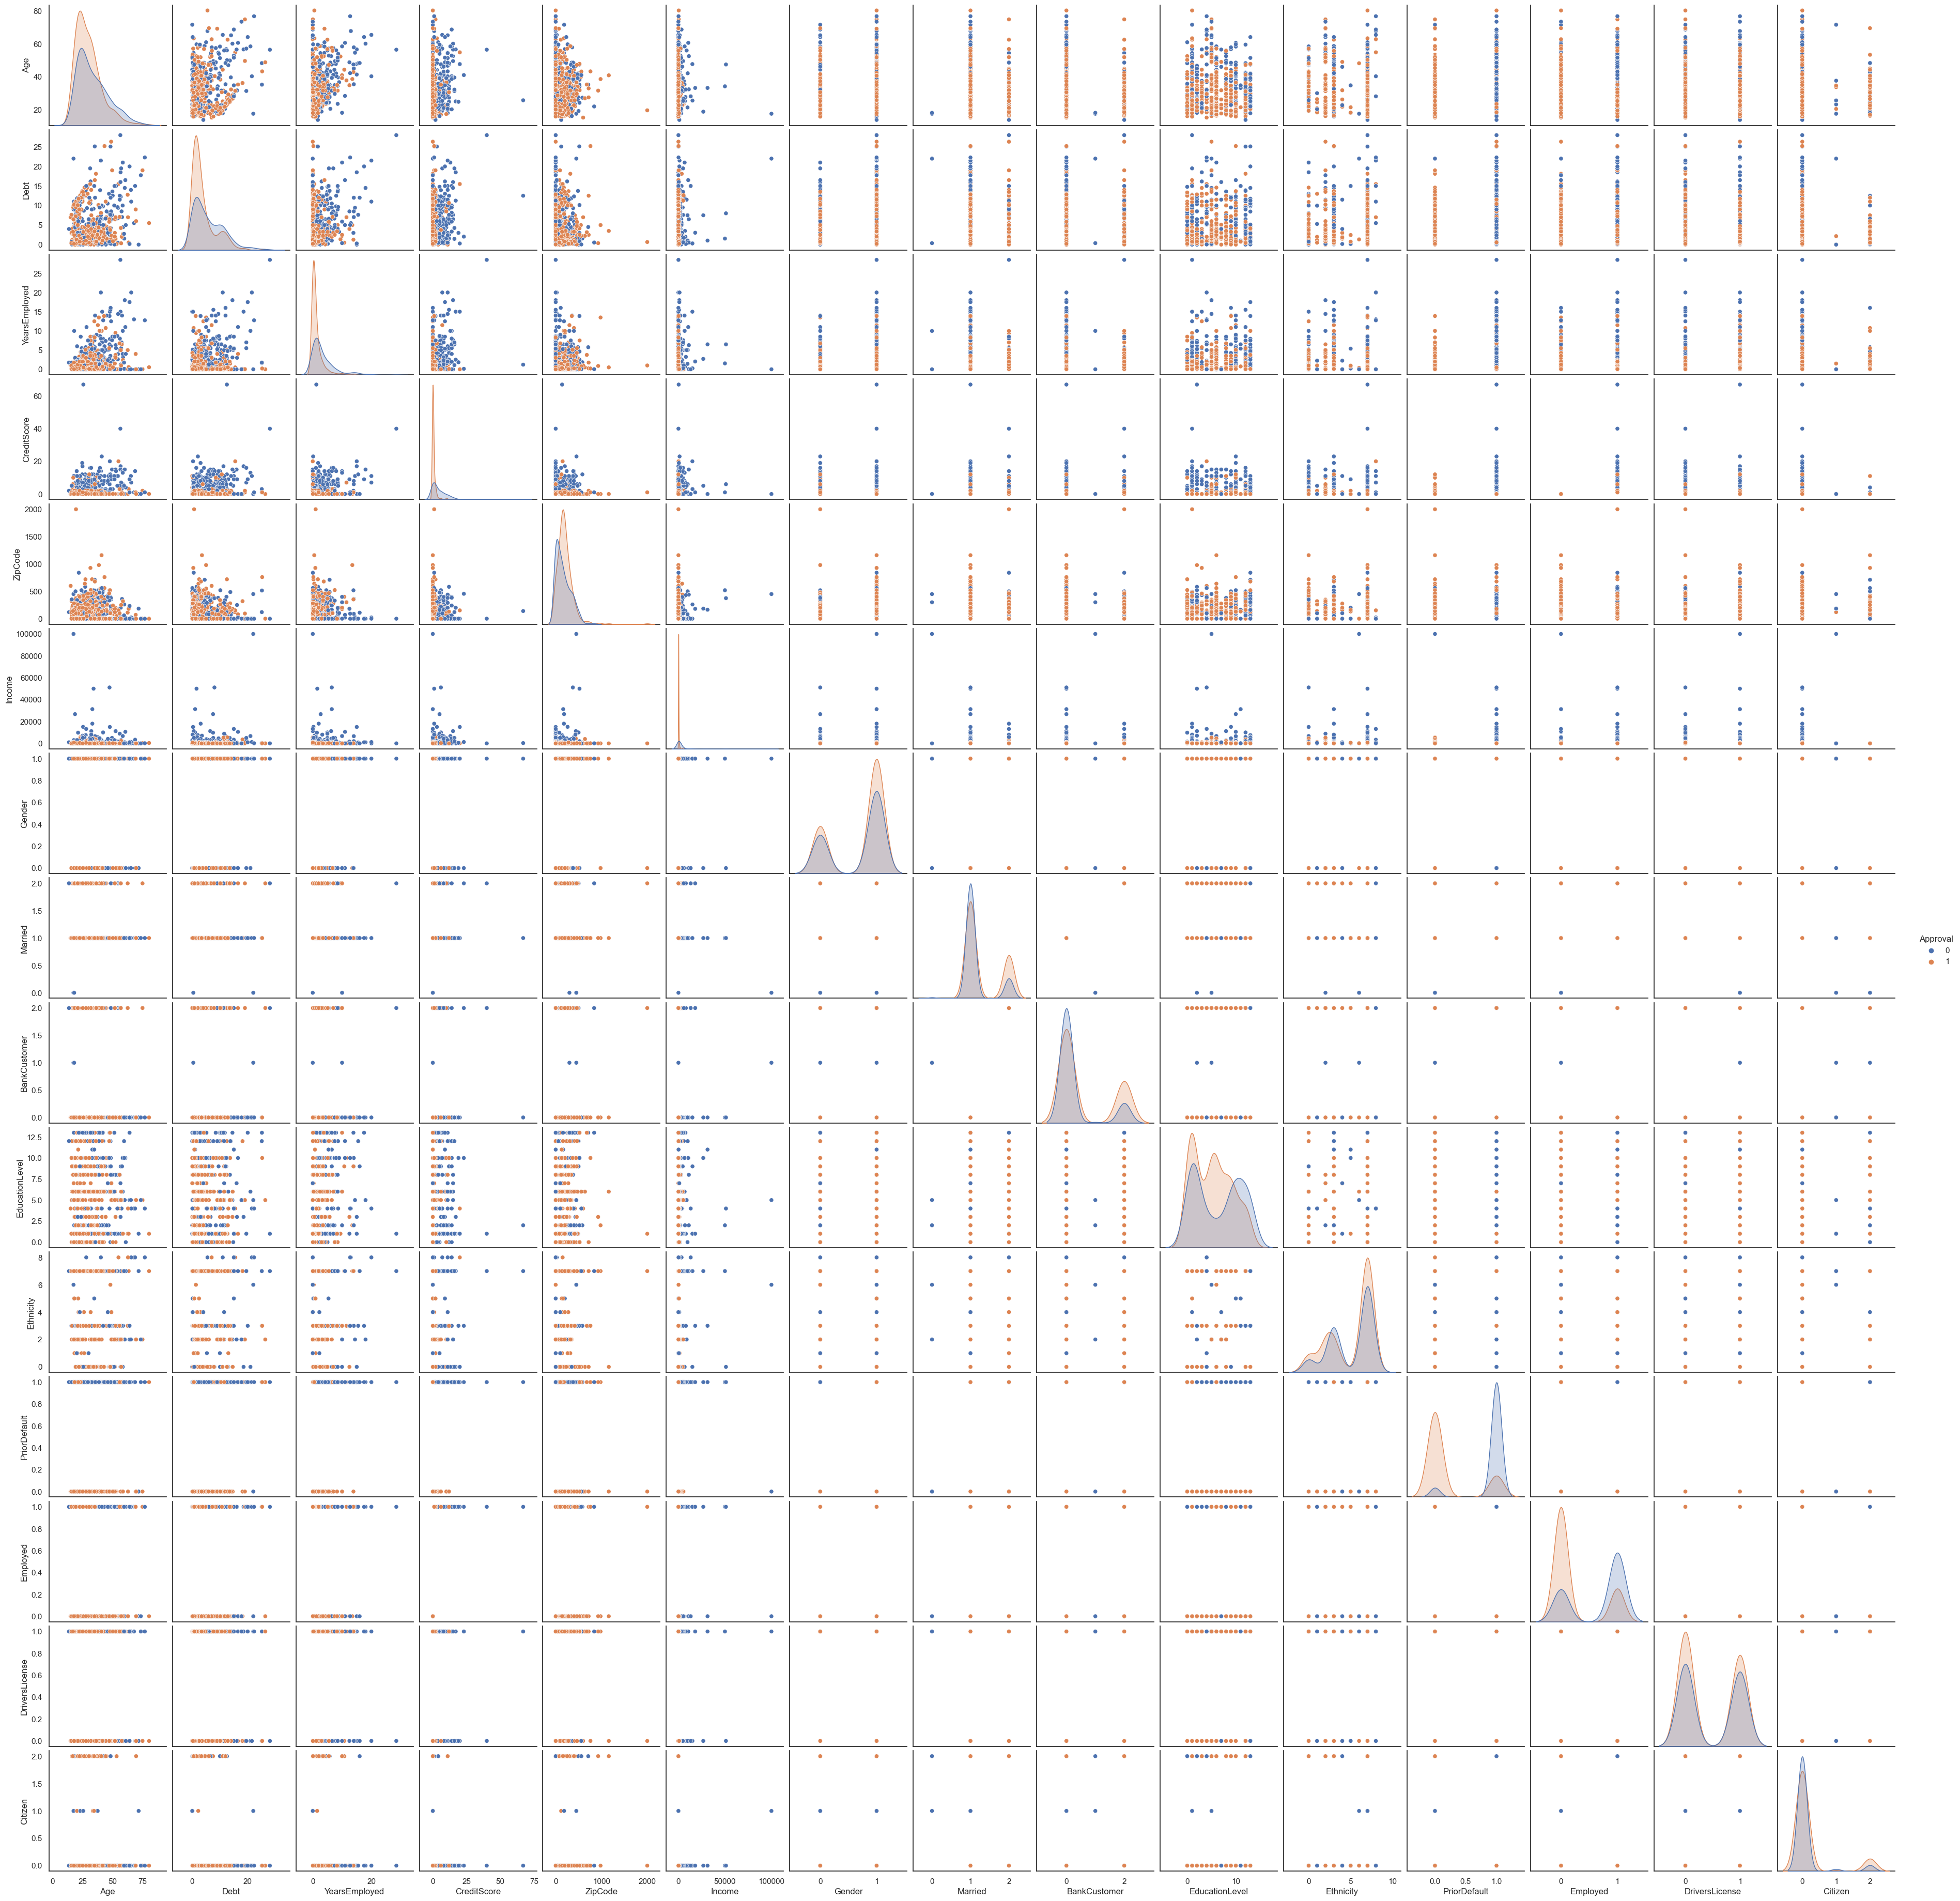

In [160]:
sns.pairplot(df_class, hue = 'Approval');

#### Response Variable

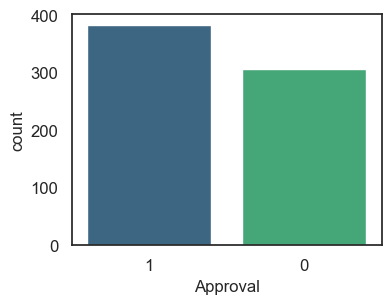

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(4,3), sharex=True)
sns.countplot(data=df_class, x='Approval',edgecolor="white",palette="viridis",order=df["Approval"].value_counts().index)
total = df['Approval'].value_counts().sum()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Approval', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show();


#### Tractament d'Outliers

In [407]:
X_colum = df_class.drop('Approval', axis=1).columns
Y_colum = df_class[['Approval']]
X_num = df_class[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']]

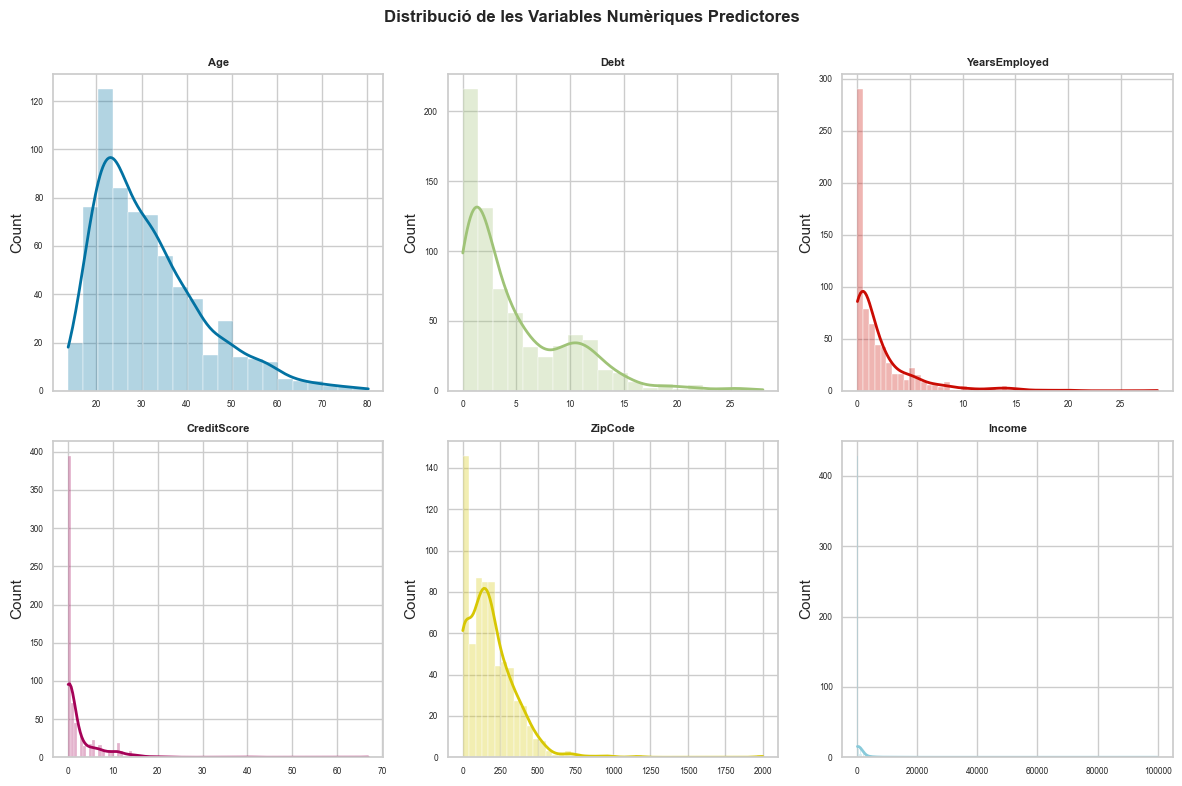

In [413]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flat

for i, colum in enumerate(X_num):
    sns.histplot(
        data    = df_class,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
     
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les Variables Numèriques Predictores', fontsize = 12, fontweight = "bold");

In [403]:
X_colnum = df_class[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']].columns

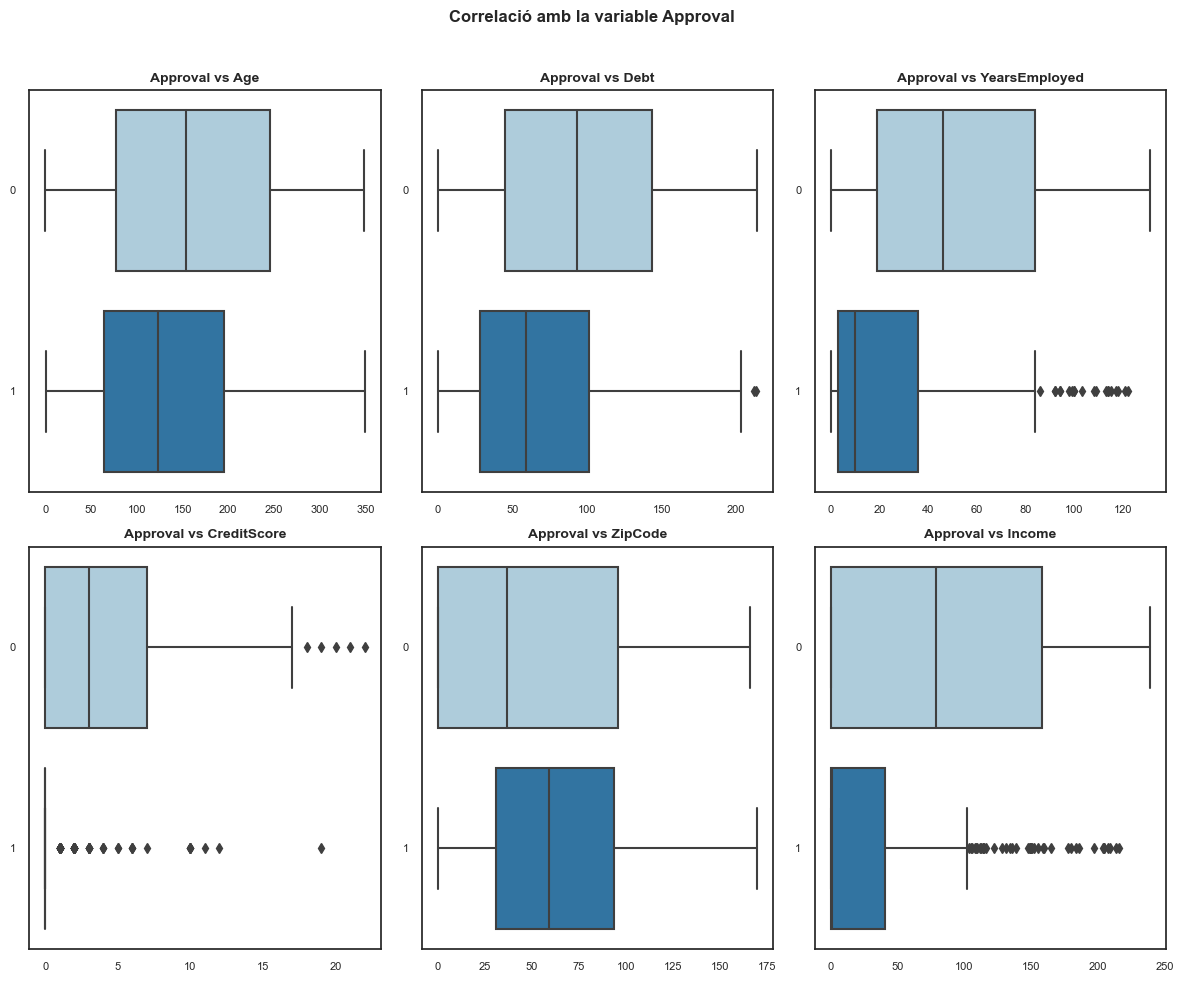

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flat

for i,colum in enumerate(X_colnum):
    sns.boxplot(
        data    = df_class,
        x       = df_class[colum],
        y       = df_class['Approval'],
        orient  = 'h',
        #color   ='skyblue',
        palette ="Paired",
        ax      = axes[i]
    ) 
    
    axes[i].set_title(f"Approval vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter()) 
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("", fontsize=8)
    axes[i].set_ylabel("", fontsize=8)

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Correlació amb la variable Approval', fontsize = 12, fontweight = "bold");

In [117]:
#Analitzem els rangs IQR*1.5 per determinar el valors limits

df_outliers = df_class.copy(deep=True)
df_outliers = df_outliers.drop(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approval'], axis=1 )

for col in df_outliers.columns:
    q75 = df_outliers[col].quantile(0.75)
    q25 = df_outliers[col].quantile(0.25)
    iqr = q75 - q25
    up_lim = q75 + 1.5*iqr 
    low_lim = q25 - 1.5*iqr 
    print(f'Outliers {col}: limits ({low_lim}, {up_lim})\n') 


Outliers Age: limits (-150.625, 440.375)

Outliers Debt: limits (-107.125, 263.875)

Outliers YearsEmployed: limits (-80.0, 144.0)

Outliers CreditScore: limits (-4.5, 7.5)

Outliers ZipCode: limits (-83.5, 200.5)

Outliers Income: limits (-160.125, 266.875)



In [118]:
def outliers_IQR(df_outliers):
    q25=df_outliers.quantile(0.25)
    q75=df_outliers.quantile(0.75)

    iqr=q75-q25

    up_lim = df_outliers[~(df_outliers>(q75+1.5*iqr))].max()
    low_lim = df_outliers[~(df_outliers<(q25-1.5*iqr))].min()

    df_outliers = np.where(df_outliers > up_lim,
       df_outliers.mean(),
       np.where(
           df_outliers < low_lim,
           df_outliers.mean(),
           df_outliers
           )
       )

    return df_outliers

In [119]:
outliers_IQR(df_outliers)

array([[156.,   0.,  30.,   1.,  69.,   0.],
       [329.,  93.,  65.,   6.,  11., 119.],
       [ 89.,  16.,  36.,   0.,  97., 140.],
       ...,
       [ 97., 186.,  46.,   1.,  68.,   1.],
       [ 20.,   7.,   1.,   0.,  97., 134.],
       [198.,  80., 108.,   0.,   0.,   0.]])

In [120]:
outliers = df_outliers[((df_outliers<(q25-1.5*iqr)) | (df_outliers>(q75+1.5*iqr)))]
outliers

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
0,NaN,NaN,NaN,NaN,NaN,NaN
1,329.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
685,NaN,NaN,NaN,NaN,NaN,NaN
686,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN
688,NaN,NaN,NaN,NaN,NaN,NaN


#### Train & Test Data

In [414]:
df = df_class.copy(deep=True)

df.head(5)

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approval
0,30.83,0.00,1.25,1,202.00,0,1,1,0,12,7,1,1,0,0,0
1,58.67,4.46,3.04,6,43.00,560,0,1,0,10,3,1,1,0,0,0
2,24.50,0.50,1.50,0,280.00,824,0,1,0,10,3,1,0,0,0,0
3,27.83,1.54,3.75,5,100.00,3,1,1,0,12,7,1,1,1,0,0
4,20.17,5.62,1.71,0,120.00,0,1,1,0,12,7,1,0,0,2,0


In [415]:
#Devidim el conjunt de dades en 2 grups: el 70% per training i el 30% per testing grup

#El paràmetre stratify conserva la proporció de com es distribueixen les dades a la columna de destí (Approval),representa aquesta mateixa proporció a train_test_split

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Approval', axis='columns'),
                                        df['Approval'],
                                        test_size=0.3,
                                        shuffle = True, 
                                        stratify = df['Approval'],
                                        random_state = 42
                                        )

In [416]:
#Comprovem les particions

print("TRAIN Dataset")
print("_________")
print("Features: ", X_train.shape, "Target: ", y_train.shape)
print(y_train.describe().T)
print("\n")
print("TEST Dataset")
print("_________")
print("Features: ", X_test.shape, "Target: ",y_test.shape)
print(y_test.describe().T)

TRAIN Dataset
_________
Features:  (483, 15) Target:  (483,)
count   483.00
mean      0.55
std       0.50
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       1.00
Name: Approval, dtype: float64


TEST Dataset
_________
Features:  (207, 15) Target:  (207,)
count   207.00
mean      0.56
std       0.50
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       1.00
Name: Approval, dtype: float64


#### Escalar o Normalitzar les dades

In [417]:
#La classe StandardScaler estandaritza les dades, aproxima la mitja a "0" y escala les dedes de forma que 
#la variança sigui igual a 1

from sklearn.preprocessing import MinMaxScaler

X_col= [['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']]

scaler= MinMaxScaler(feature_range=(0, 1))
X_train_transf = scaler.fit_transform(X_train)
X_train_transf = pd.DataFrame(X_train_transf, columns = X_col )

X_test_transf = scaler.transform(X_test)
X_test_transf = pd.DataFrame(X_test_transf, columns = X_col)

### Classifiers

#### Lazy Classifier

LazyPredict ens permet llançar diferents models de scikit-Learn amb els paràmetres per defecte per a comprovar el rendiment de cadascun d'ells en el nostre dataset i enfocar-nos a optimitzar aquells que millor s'ajusten.

In [40]:
#help
LazyClassifier?

Object `LazyClassifier` not found.


In [168]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 20.95it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.86,0.86,0.86,0.86,0.21
NuSVC,0.85,0.85,0.85,0.85,0.03
ExtraTreesClassifier,0.85,0.84,0.84,0.85,0.13
XGBClassifier,0.84,0.84,0.84,0.84,0.15
LogisticRegression,0.84,0.84,0.84,0.84,0.02
LGBMClassifier,0.84,0.84,0.84,0.84,0.09
Perceptron,0.83,0.84,0.84,0.83,0.02
LinearSVC,0.83,0.84,0.84,0.83,0.03
SVC,0.84,0.84,0.84,0.84,0.04


### M1_Model de Regressió Logística

In [190]:
from sklearn.linear_model import LogisticRegression

regLG = LogisticRegression()
regLG.fit(X_train_transf, y_train)

LogisticRegression()

In [170]:
pred_regLG = regLG.predict(X_test_transf)

In [171]:
proba_regLG = regLG.predict_proba(X_test_transf)

In [172]:
comp_regLG = pd.DataFrame({'Actual':y_test,
                           'Predicció':pred_regLG })
comp_regLG.sample(5)

,Actual,Predicció
369,1,1
168,0,0
671,1,1
627,1,1
605,1,1


### M2_Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

randFC = RandomForestClassifier()
randFC.fit(X_train_transf, y_train)

RandomForestClassifier()

In [174]:
pred_randFC = randFC.predict(X_test_transf)

In [175]:
proba_randFC = randFC.predict_proba(X_test_transf)

In [176]:
comp_randFC = pd.DataFrame({'Actual':y_test,
                            'Predicció':pred_randFC })
comp_randFC.sample(5)

,Actual,Predicció
304,1,1
591,0,0
469,1,1
584,0,0
514,0,1


### M3_XGboost

In [177]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train_transf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
pred_XGB = XGB.predict(X_test_transf)

In [179]:
proba_XGB = XGB.predict_proba(X_test_transf)

In [180]:
comp_XGB = pd.DataFrame({'Actual':y_test,
                            'Predicció':pred_XGB })
comp_XGB.sample(5)

,Actual,Predicció
13,0,1
340,1,1
345,1,1
168,0,0
53,0,0


### Verificació del Model de Regressió Logística

In [181]:
X = X_test
y = y_test

In [182]:
print(f'Accuracy: {accuracy_score(y_test, pred_regLG)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_regLG)}')

print("\n", classification_report(y_test, pred_regLG))

print(f'\nCross Validation Scores: {cross_val_score(regLG, X, y, cv=5)}')

Accuracy: 0.8260869565217391
B-Accuracy: 0.8293478260869566

               precision    recall  f1-score   support

           0       0.77      0.86      0.81        92
           1       0.88      0.80      0.84       115

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207


Cross Validation Scores: [0.83333333 0.69047619 0.92682927 0.7804878  0.80487805]


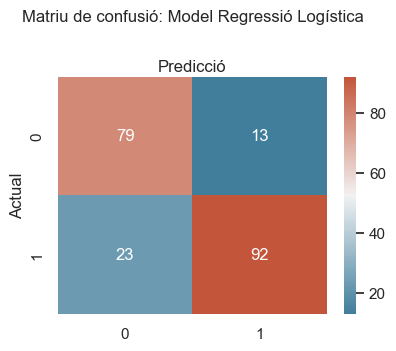

In [183]:
mx_regLG = pd.DataFrame(metrics.confusion_matrix(y_test, pred_regLG))

#Grafiquem Matriu de confusió

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_regLG, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model Regressió Logística", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### Verificació Random Forest Classifier

In [184]:
print(f'Accuracy: {accuracy_score(y_test, pred_randFC)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_randFC)}')

print("\n", classification_report(y_test, pred_randFC))

print(f'\nCross Validation Scores: {cross_val_score(randFC, X, y)}')

Accuracy: 0.8599033816425121
B-Accuracy: 0.857608695652174

               precision    recall  f1-score   support

           0       0.85      0.84      0.84        92
           1       0.87      0.88      0.87       115

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207


Cross Validation Scores: [0.85714286 0.80952381 0.92682927 0.7804878  0.85365854]


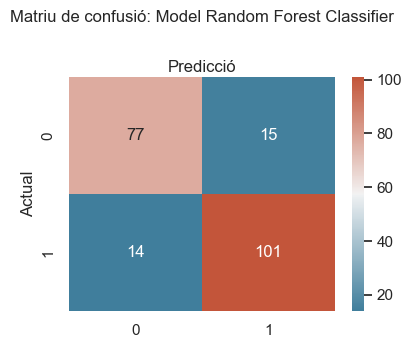

In [185]:
mx_randFC = pd.DataFrame(metrics.confusion_matrix(y_test, pred_randFC))

#Grafiquem Matriu de confusió

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_randFC, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model Random Forest Classifier", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### Verificació del Model XGboost

In [186]:
print(f'Accuracy: {accuracy_score(y_test, pred_XGB)}')
print(f'B-Accuracy: {balanced_accuracy_score(y_test, pred_XGB)}')

print("\n", classification_report(y_test, pred_XGB ))

print(f'\nCross Validation Scores: {cross_val_score(XGB, X, y)}')

Accuracy: 0.8405797101449275
B-Accuracy: 0.8391304347826087

               precision    recall  f1-score   support

           0       0.82      0.83      0.82        92
           1       0.86      0.85      0.86       115

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207


Cross Validation Scores: [0.85714286 0.76190476 0.87804878 0.75609756 0.80487805]


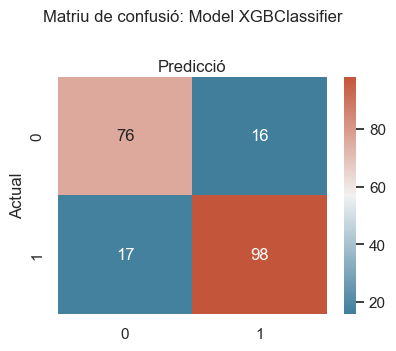

In [187]:
mx_XGB = pd.DataFrame(metrics.confusion_matrix(y_test, pred_XGB))

#Grafiquem

fig,ax = plt.subplots(figsize=(4,3))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(mx_XGB, annot=True, cmap=cmap, fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriu de confusió: Model XGBClassifier", y = 1.2)
plt.ylabel("Actual")
plt.xlabel("Predicció")

plt.show();

### Feature Importances

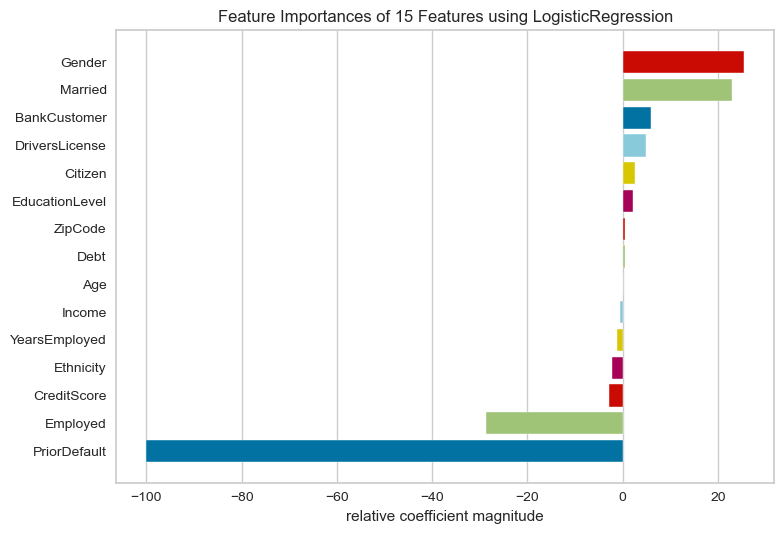

In [261]:
model = LogisticRegression()
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show();

In [270]:
def plot_importance(classifer, X_train, point_size = 20):

    values = sorted(zip(X_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    impt = pd.DataFrame(values,columns = ["Name", "Score"])
    impt.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = impt,s = point_size, color='blue').set(
    xlabel='Importance', 
    ylabel='Features')

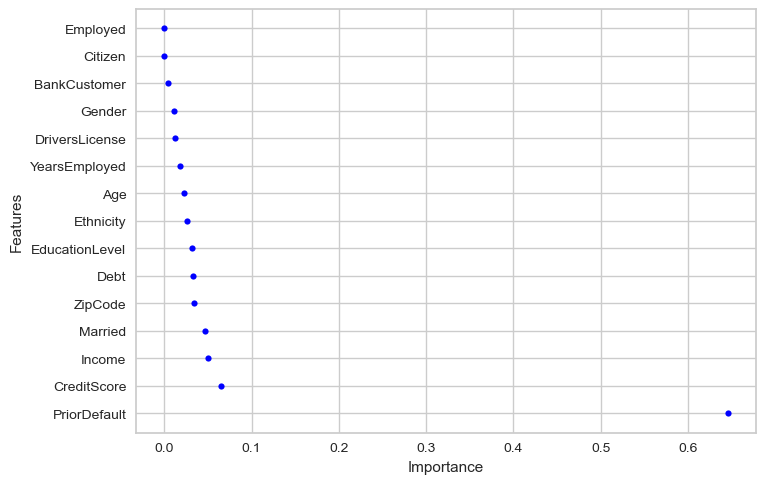

In [271]:
plot_importance(XGB, X, 20)

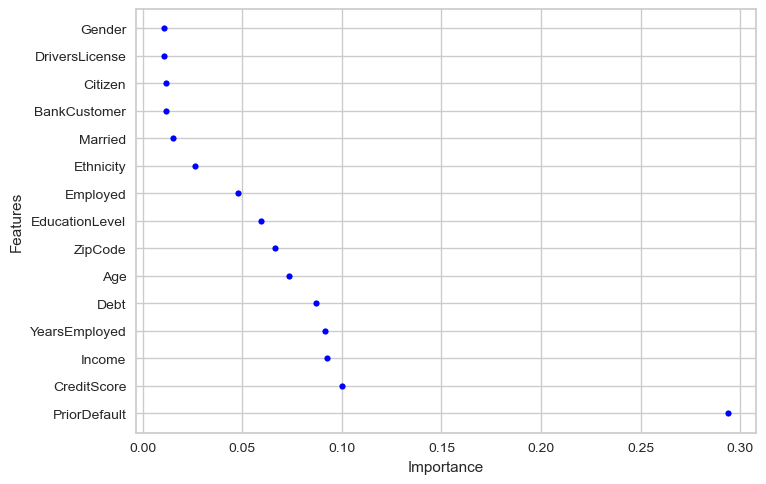

In [269]:
plot_importance(randFC, X, 20)

### Best Performaing Model

In [206]:
# Definim els valors per tol i max_iter

tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

param_grid = dict(tol=[0.01,0.001,0.0001],max_iter=[100,150,200])

In [211]:
X_sc = df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']]

y_sc = df[['Approval']]

In [212]:
grid_model = GridSearchCV(estimator=regLG, param_grid=param_grid, cv=5)

rescalX = scaler.fit_transform(X_sc) 

# Fiting data to grid_model
grid_model_result = grid_model.fit(rescalX, y_sc)

# Summarizing results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best score: %f using parameters %s" % (best_score, best_params))

Best score: 0.853623 using parameters {'max_iter': 100, 'tol': 0.01}


In [214]:
reg_log2= LogisticRegression(tol= 0.01,max_iter=100,solver='liblinear')

In [215]:
reg_log2.fit(X_train_transf, y_train)

LogisticRegression(solver='liblinear', tol=0.01)

In [217]:
X_trn = X_train_transf
X_tst = X_test_transf 
y_trn = y_train
y_tst = y_test

pred_yTest = reg_log2.predict(X_tst)

# Predicting probablities on data
prob_yTrain = reg_log2.predict_proba(X_trn)
prob_yTest = reg_log2.predict_proba(X_tst)

# Grafiquem
target_names = ['Approved','NotApproved']
print("Performance on the Test data:\n", metrics.classification_report(y_test, pred_yTest, target_names=target_names))

Performance on the Test data:
               precision    recall  f1-score   support

    Approved       0.76      0.88      0.82        92
 NotApproved       0.89      0.78      0.83       115

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207



### Information Values + WOE: Concept and Application

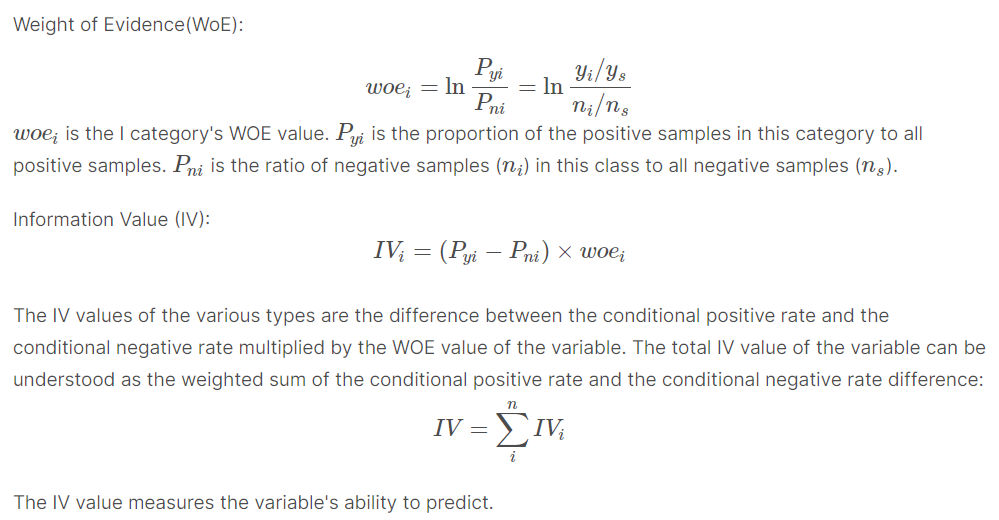

In [418]:
df.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approval'],
      dtype='object')

#### Features

In [419]:
target = df['Approval']

In [426]:
ivtable=pd.DataFrame(df_num.columns, columns=['variable'])
ivtable['IV']=None
namelist = []

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

In [421]:
# Calculate information value
def calc_iv(df, feature, target, bins=10, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                            # Variable
                    val,                                                                # Value
                    df[df[feature] == val].count()[feature],                            # All
                    df[(df[feature] == val) & (df['Approval'] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df['Approval'] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [499]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

#### Binary features

In [431]:
print(df_num['Gender'].value_counts())
iv, data = calc_iv(df,'Gender','Approval')
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

b    468
a    210
Name: Gender, dtype: int64
This variable's IV is: 0.003382327972331043
1    480
0    210
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,210,98,112,0.30,0.53,0.32,0.29,0.09,0.00
1,Gender,1,480,209,271,0.70,0.56,0.68,0.71,-0.04,0.00


In [430]:
print(df_num['PriorDefault'].value_counts())
iv, data=calc_iv(df,'PriorDefault','Approval')
ivtable.loc[ivtable['variable']=='PriorDefault','IV']=iv
data.head()

t    361
f    329
Name: PriorDefault, dtype: int64
This variable's IV is: 2.8188642573079323
1    361
0    329
Name: PriorDefault, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,PriorDefault,0,329,23,306,0.48,0.93,0.07,0.80,-2.37,1.71
1,PriorDefault,1,361,284,77,0.52,0.21,0.93,0.20,1.53,1.11


In [432]:
print(df_num['Employed'].value_counts())
iv, data=calc_iv(df,'Employed','Approval')
ivtable.loc[ivtable['variable']=='Employed','IV']=iv
data.head()

f    395
t    295
Name: Employed, dtype: int64
This variable's IV is: 0.910995317542127
0    395
1    295
Name: Employed, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Employed,0,395,98,297,0.57,0.75,0.32,0.78,-0.89,0.40
1,Employed,1,295,209,86,0.43,0.29,0.68,0.22,1.11,0.51


In [433]:
print(df_num['DriversLicense'].value_counts())
iv, data=calc_iv(df,'DriversLicense','Approval')
ivtable.loc[ivtable['variable']=='DriversLicense','IV']=iv
data.head()

f    374
t    316
Name: DriversLicense, dtype: int64
This variable's IV is: 0.004048703731963167
0    374
1    316
Name: DriversLicense, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,DriversLicense,0,374,161,213,0.54,0.57,0.52,0.56,-0.06,0.00
1,DriversLicense,1,316,146,170,0.46,0.54,0.48,0.44,0.07,0.00


#### Categorical Variables

In [440]:
print(df_num['Married'].value_counts())
iv, data=calc_iv(df,'Married','Approval')
ivtable.loc[ivtable['variable']=='Married','IV']=iv
data.head()

u    519
y    163
l      2
Name: Married, dtype: int64
This variable's IV is: 0.15130983389831523
1    525
2    163
0      2
Name: Married, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Married,0,2,2,0,0.00,0.00,0.01,0.00,0.00,0.00
1,Married,1,525,260,265,0.76,0.50,0.85,0.69,0.20,0.03
2,Married,2,163,45,118,0.24,0.72,0.15,0.31,-0.74,0.12


In [441]:
print(df_num['BankCustomer'].value_counts())
iv, data=calc_iv(df,'BankCustomer','Approval')
ivtable.loc[ivtable['variable']=='BankCustomer','IV']=iv
data.head()

g     519
p     163
gg      2
Name: BankCustomer, dtype: int64
This variable's IV is: 0.15130983389831523
0    525
2    163
1      2
Name: BankCustomer, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,BankCustomer,0,525,260,265,0.76,0.50,0.85,0.69,0.20,0.03
1,BankCustomer,1,2,2,0,0.00,0.00,0.01,0.00,0.00,0.00
2,BankCustomer,2,163,45,118,0.24,0.72,0.15,0.31,-0.74,0.12


In [442]:
print(df_num['EducationLevel'].value_counts())
iv, data=calc_iv(df,'EducationLevel','Approval')
ivtable.loc[ivtable['variable']=='EducationLevel','IV']=iv
data.head()

c       137
q        78
w        64
i        59
aa       54
ff       53
k        51
cc       41
m        38
x        38
d        30
e        25
j        10
NULL      9
r         3
Name: EducationLevel, dtype: int64
This variable's IV is: 0.6599854846840725
1     146
10     78
12     64
6      59
0      54
5      53
8      51
2      41
9      38
13     38
3      30
4      25
7      10
11      3
Name: EducationLevel, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,EducationLevel,0,54,19,35,0.08,0.65,0.06,0.09,-0.39,0.01
1,EducationLevel,1,146,66,80,0.21,0.55,0.21,0.21,0.03,0.00
2,EducationLevel,2,41,29,12,0.06,0.29,0.09,0.03,1.10,0.07
3,EducationLevel,3,30,7,23,0.04,0.77,0.02,0.06,-0.97,0.04
4,EducationLevel,4,25,14,11,0.04,0.44,0.05,0.03,0.46,0.01


In [443]:
print(df_num['Ethnicity'].value_counts())
iv, data=calc_iv(df,'Ethnicity','Approval')
ivtable.loc[ivtable['variable']=='Ethnicity','IV']=iv
data.head()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
This variable's IV is: 0.3026016043747465
7    408
3    138
0     59
2     57
4      8
8      8
1      6
5      4
6      2
Name: Ethnicity, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Ethnicity,0,59,25,34,0.09,0.58,0.08,0.09,-0.09,0.00
1,Ethnicity,1,6,2,4,0.01,0.67,0.01,0.01,-0.47,0.00
2,Ethnicity,2,57,8,49,0.08,0.86,0.03,0.13,-1.59,0.16
3,Ethnicity,3,138,87,51,0.20,0.37,0.28,0.13,0.76,0.11
4,Ethnicity,4,8,3,5,0.01,0.62,0.01,0.01,-0.29,0.00


In [444]:
print(df_num['Citizen'].value_counts())
iv, data=calc_iv(df,'Citizen','Approval')
ivtable.loc[ivtable['variable']=='Citizen','IV']=iv
data.head()

g    625
s     57
p      8
Name: Citizen, dtype: int64
This variable's IV is: 0.058357859133312213
0    625
2     57
1      8
Name: Citizen, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Citizen,0,625,287,338,0.91,0.54,0.93,0.88,0.06,0.00
1,Citizen,1,8,5,3,0.01,0.38,0.02,0.01,0.73,0.01
2,Citizen,2,57,15,42,0.08,0.74,0.05,0.11,-0.81,0.05


#### Continous Variables

In [472]:
df_num['Income']=df_num['Income'].astype(object)
df_num['Income'] = df_num['Income']*1000
print(df_num['Income'].value_counts(bins=10,sort=False))

(-0.00100000001, 1e-09]    678
(1e-09, 2e-09]               7
(2e-09, 3e-09]               1
(3e-09, 4e-09]               1
(4e-09, 5e-09]               1
(5e-09, 6e-09]               1
(6e-09, 7e-09]               0
(7e-09, 8e-09]               0
(8e-09, 9e-09]               0
(9e-09, 1e-08]               1
Name: Income, dtype: int64


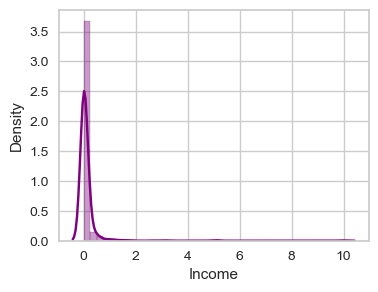

In [464]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.distplot(a=df.Income, bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.show();

In [510]:
df['Income'].value_counts()
iv, data=calc_iv(df,'Income','Approval')
ivtable.loc[ivtable['variable']=='Income','IV']=iv
data.head()

This variable's IV is: 0.30785730354601654
0.00    295
0.00     29
0.05     10
0.10     10
0.00      9
       ... 
0.17      1
0.09      1
0.67      1
0.25      1
0.07      1
Name: Income, Length: 240, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Income,0.00,295,113,182,0.43,0.62,0.37,0.48,-0.26,0.03
1,Income,0.00,29,2,27,0.04,0.93,0.01,0.07,-2.38,0.15
2,Income,0.00,9,0,9,0.01,1.00,0.00,0.02,0.00,-0.00
3,Income,0.00,6,1,5,0.01,0.83,0.00,0.01,-1.39,0.01
4,Income,0.00,5,0,5,0.01,1.00,0.00,0.01,0.00,-0.00


(13.683, 20.4]   0.14
(20.4, 27.05]    0.30
(27.05, 33.7]    0.20
(33.7, 40.35]    0.14
(40.35, 47.0]    0.08
(47.0, 53.65]    0.06
(53.65, 60.3]    0.04
(60.3, 66.95]    0.01
(66.95, 73.6]    0.01
(73.6, 80.25]    0.00
Name: Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

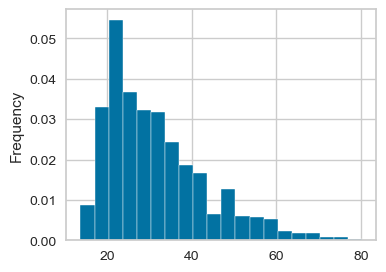

In [466]:
print(df_num['Age'].value_counts(bins=10,normalize=True,sort=False))
fig, ax = plt.subplots(figsize=(4, 3))
df['Age'].plot(kind='hist',bins=20,density=True);

In [511]:
df['Age'].value_counts()
iv, data=calc_iv(df,'Age','Approval')
ivtable.loc[ivtable['variable']=='Age','IV']=iv
data.head()

This variable's IV is: 0.23241738455012229
31.57    12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Age,13.75,1,1,0,0.00,0.00,0.00,0.00,0.00,0.00
1,Age,15.17,1,0,1,0.00,1.00,0.00,0.00,0.00,-0.00
2,Age,15.75,1,0,1,0.00,1.00,0.00,0.00,0.00,-0.00
3,Age,15.83,2,1,1,0.00,0.50,0.00,0.00,0.22,0.00
4,Age,15.92,1,0,1,0.00,1.00,0.00,0.00,0.00,-0.00


(-0.029, 2.8]    347
(2.8, 5.6]       129
(5.6, 8.4]        55
(8.4, 11.2]       72
(11.2, 14.0]      53
(14.0, 16.8]      17
(16.8, 19.6]       7
(19.6, 22.4]       5
(22.4, 25.2]       2
(25.2, 28.0]       3
Name: Debt, dtype: int64


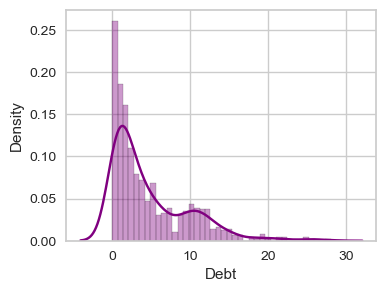

In [470]:
df_num['Debt']=df_num['Debt'].astype(object)
df_num['Debt'] = df_num['Debt']
print(df['Debt'].value_counts(bins=10,sort=False))

fig, ax = plt.subplots(figsize=(4, 3))
sns.distplot(a=df.Debt, bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.show();

In [513]:
df['Debt'].value_counts()
iv, data=calc_iv(df,'Debt','Approval')
ivtable.loc[ivtable['variable']=='Debt','IV']=iv
data.head()

This variable's IV is: 0.3115870941781667
1.50     21
0.00     19
3.00     19
2.50     19
0.75     16
         ..
0.09      1
12.25     1
11.05     1
11.12     1
3.38      1
Name: Debt, Length: 215, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Debt,0.00,19,9,10,0.03,0.53,0.03,0.03,0.12,0.00
1,Debt,0.04,5,3,2,0.01,0.40,0.01,0.01,0.63,0.00
2,Debt,0.08,1,1,0,0.00,0.00,0.00,0.00,0.00,0.00
3,Debt,0.09,1,0,1,0.00,1.00,0.00,0.00,0.00,-0.00
4,Debt,0.12,5,2,3,0.01,0.60,0.01,0.01,-0.18,0.00


(-0.029500000000000002, 2.85]    523
(2.85, 5.7]                       95
(5.7, 8.55]                       37
(8.55, 11.4]                      12
(11.4, 14.25]                     12
(14.25, 17.1]                      6
(17.1, 19.95]                      2
(19.95, 22.8]                      2
(22.8, 25.65]                      0
(25.65, 28.5]                      1
Name: YearsEmployed, dtype: int64


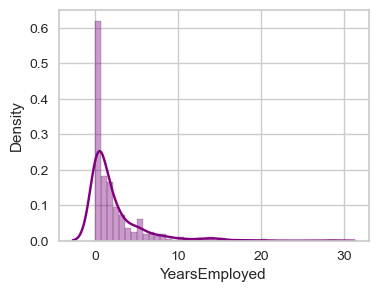

In [515]:
df['YearsEmployed']=df['YearsEmployed'].astype(object)
df['YearsEmployed'] = df['YearsEmployed']
print(df['YearsEmployed'].value_counts(bins=10,sort=False))

fig, ax = plt.subplots(figsize=(4, 3))
sns.distplot(a=df.YearsEmployed, bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.show();

In [516]:
df['YearsEmployed'].value_counts()
iv, data=calc_iv(df,'YearsEmployed','Approval')
ivtable.loc[ivtable['variable']=='YearsEmployed','IV']=iv
data.head()

This variable's IV is: 0.6510365242551757
0.00    70
0.25    35
0.04    33
1.00    31
0.12    30
        ..
4.16     1
9.00     1
1.96     1
5.12     1
8.29     1
Name: YearsEmployed, Length: 132, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,YearsEmployed,0.00,70,18,52,0.10,0.74,0.06,0.14,-0.84,0.06
1,YearsEmployed,0.04,33,13,20,0.05,0.61,0.04,0.05,-0.21,0.00
2,YearsEmployed,0.09,26,5,21,0.04,0.81,0.02,0.05,-1.21,0.05
3,YearsEmployed,0.12,30,5,25,0.04,0.83,0.02,0.07,-1.39,0.07
4,YearsEmployed,0.17,22,2,20,0.03,0.91,0.01,0.05,-2.08,0.10


(-0.068, 6.7]    595
(6.7, 13.4]       72
(13.4, 20.1]      20
(20.1, 26.8]       1
(26.8, 33.5]       0
(33.5, 40.2]       1
(40.2, 46.9]       0
(46.9, 53.6]       0
(53.6, 60.3]       0
(60.3, 67.0]       1
Name: CreditScore, dtype: int64


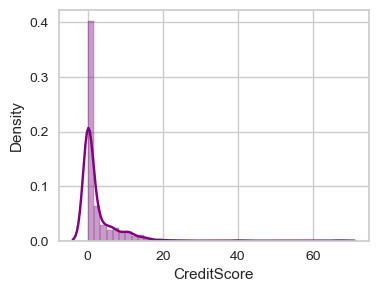

In [517]:
df['CreditScore']=df['CreditScore'].astype(object)
df['CreditScore'] = df['CreditScore']
print(df['CreditScore'].value_counts(bins=10,sort=False))

fig, ax = plt.subplots(figsize=(4, 3))
sns.distplot(a=df.CreditScore, bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.show();

In [518]:
df['CreditScore'].value_counts()
iv, data=calc_iv(df,'CreditScore','Approval')
ivtable.loc[ivtable['variable']=='CreditScore','IV']=iv
data.head()

This variable's IV is: 1.0935022849905716
0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8
14      8
12      8
15      4
16      3
20      2
17      2
23      1
40      1
67      1
13      1
19      1
Name: CreditScore, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,CreditScore,0,395,98,297,0.57,0.75,0.32,0.78,-0.89,0.40
1,CreditScore,1,71,35,36,0.10,0.51,0.11,0.09,0.19,0.00
2,CreditScore,2,45,19,26,0.07,0.58,0.06,0.07,-0.09,0.00
3,CreditScore,3,28,20,8,0.04,0.29,0.07,0.02,1.14,0.05
4,CreditScore,4,15,12,3,0.02,0.20,0.04,0.01,1.61,0.05


Amb els mètodes IV i WOE, podem predir si són significatives abans de modelar.
Les variables amb més capacitat predictives són, la millor opció per al desenvolupament de models.
L'ús de bins customitzats per predictors feble pot convertir-los en bons predictors.
Tenint en compte l'enorme grandària de les dades d'entrenament, poques característiques significatives per a la predicció (entre 0,3 a 0,5 IV) poden resultar d'una puntuació comparativament millor.